**Kelompok 1A**

# **Team Data Wizard**
1. Muhamad Ali Yafi
2. Hafiizh Taufiqul Hakim
3. Sutin Bobihu
4. Muhammad Sodikur Rifki
5. Larasati Syarafina Qamarani
6. Ligia Juita Sari
7. Anggun Nur Musyarofah
8. Silvia Risma Febiola Marbun

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
data = pd.read_csv(r"/content/Training Data.csv")

In [ ]:
data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
total = len(data)

In [ ]:
total

252000

### Tugas No 1 Descriptive Statistics

In [ ]:
 # Cek tipe data dan missing value
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Dari syntax `data.info()`, terlihat bahwa kolom Id memiliki tipe data int64 atau integer. Hal ini tidak sesuai karena karakter pada Id bukanlah kumpulan angka yang bisa dilakukan operasi matematika. Sehingga diperlukan penyesuaian dengan mengubah tipe data pada kolom Id dari Int64 menjadi object.

In [ ]:
# Ubah tipe data kolom Id
data['Id'] = data['Id'].astype(str)

# Cek apakah tipe data sudah sesuai dan cek missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  object
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 25.0+ MB


Terlihat bahwa kolom Id sudah memiliki tipe data yang sesuai. Terdapat 7 kolom kategorikal dengan tipe data object dan 6 kolom numerik dengan tipe data int64.

Dalam dataset yang tersedia, tidak ada kolom yang memiliki missing value karena total data pada setiap kolom memiliki jumlah yang sama.

In [ ]:
# Check summary pada kolom numerik
data.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Dari statistical summary kolom numerik pada dataset, data yang tersedia dapat dikatakan sudah sesuai.

* Tidak terlihat adanya ketimpangan data yang signifikan. Nilai min dan max maupun nilai mean dan median pada setiap kolom tidak memiliki jarak yang terlalu jauh sehingga masih dalam batas wajar.
* Nilai min, max, dan quartile pada kolom Income, Age, Experience, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, dan Risk_Flag berupa bilangan bulat. Sedangkan kolom Income sudah pasti memiliki nilai berupa desimal karena terdapat banyak variasi nilai.



In [ ]:
# Check summary pada kolom kategorikal (kolom dengan tipe data object)
data[data.select_dtypes(include=['object']).columns].describe()
# data[['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']].describe()

,Id,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000,252000
unique,252000,2,3,2,51,317,29
top,1,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,1,226272,231898,176000,5957,1259,28400


Dari summary kolom kategorikal, terlihat bahwa tidak ada ketimpangan data yang signifikan.

* Kolom Married/Single memiliki 2 data unique dimana value dengan frekuensi paling banyak adalah 'single'.
* Kolom House_Ownership memiliki 3 unique value dimana 'rented' sebagai value dengan frekuensi terbanyak.
* Kolom Car_Ownership memiliki 2 unique value dengan 'no' sebagai yang merepresentasikan bahwa nasabah tidak memiliki rumah, merupakan value dengan frekuensi paling banyak.
* Kolom Profession, CITY, dan STATE memiliki beragam unique value.

Dari kesimpulan ini, dapat dikatakan bahwa data yang tersedia dalam dataset sudah sesuai dan dapat digunakan.

### Tugas No 2 Univariate Analysis

In [ ]:
# Memeriksa duplikat data
data.duplicated().sum()

0

Tidak terdapat data duplikat.

In [ ]:
# Membagi kolom berdasarkan tipe data numerik dan kategorik
categorical = ["Married/Single", "House_Ownership", "Car_Ownership", "Profession", "CITY", "STATE"]
numerical = ["Income", "Age", "Experience", "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS", "Risk_Flag"]

In [ ]:
# Melalukan subset pada data numerik
num_dtypes = ['int16','int32','int64','float16','float32','float64']

# Subset dataloan
num_dataloan = data.select_dtypes(include=num_dtypes)
numericals=[col for col in num_dataloan.columns if col != 'Id']
print(numericals)

['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']


In [ ]:
# Melalukan subset pada data kategorik
cat_dtypes = ['object']

# Subset dataloan
cat_dataloan = data.select_dtypes(include=cat_dtypes)
categoricals = [col for col in num_dataloan.columns if col != 'Profession']
print(categoricals)

['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']


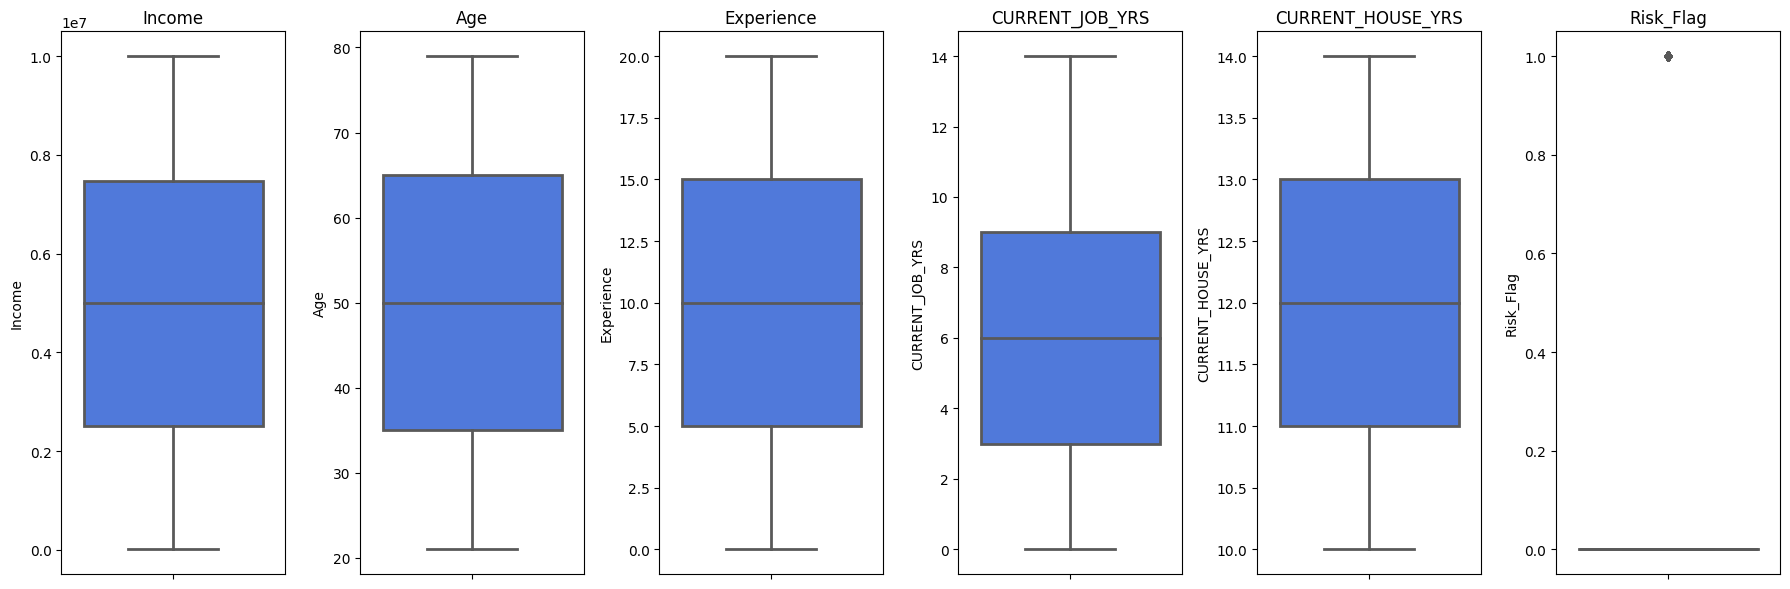

In [ ]:
# Menggunakan len(numerical) untuk mendapatkan jumlah fitur numerik
palette=['#3970F1', '#D63434']
plt.figure(figsize=(18, 6))
# Loop melalui fitur numerik dan membuat subplot untuk setiap fitur
for i in range(len(numericals)):
    plt.subplot(1, len(numericals), i + 1)
    sns.boxplot(y=data[numericals[i]], palette=palette, orient='y', linewidth=2)
    plt.title(numericals[i])
    plt.tight_layout()

plt.show()

Boxplot "Income", "CURRENT_HOUSE_YRS", "Experience" menunjukkan distribusi normal dalam bentuk simetris boxplot dimana;
- Garis median berada di tengah kotak,
- Garis ujung kotak menunjukkan kuartil (Q1, Q3),
- Garis melintang (whiskers) menunjukkan rentang interkuartil (IQR), rentang antara (Q1, Q3),
- Tidak ada titik outlier dalam data ini.
Boxplot ini memberikan informasi jelas tentang sebaran "Income", "CURRENT_HOUSE_YRS", "Experience" yang berpusat di sekitar nilai median.

CURRENT_JOB_YRS menunjukkan distribusi data yang cenderung menumpuk dibagian paling rendah/bawah.

In [ ]:
numerical = ["Income", "Age", "Experience", "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS"] # Risk_flag tidak dimasukkan
# Fungsi untuk mendeteksi outlier menggunakan rumus IQR
def deteksi_outlier(dataloan, kolom):
    Q1 = dataloan[kolom].quantile(0.25)
    Q3 = dataloan[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    outliers = dataloan[(dataloan[kolom] < batas_bawah) | (dataloan[kolom] > batas_atas)]
    return outliers

# Mendeteksi outlier untuk setiap kolom numerik
for kolom in numerical:
    outliers = deteksi_outlier(data, kolom)
    print(f"Outlier dalam kolom '{kolom}':")
    print(outliers)

Outlier dalam kolom 'Income':
Empty DataFrame
Columns: [Id, Income, Age, Experience, Married/Single, House_Ownership, Car_Ownership, Profession, CITY, STATE, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, Risk_Flag]
Index: []
Outlier dalam kolom 'Age':
Empty DataFrame
Columns: [Id, Income, Age, Experience, Married/Single, House_Ownership, Car_Ownership, Profession, CITY, STATE, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, Risk_Flag]
Index: []
Outlier dalam kolom 'Experience':
Empty DataFrame
Columns: [Id, Income, Age, Experience, Married/Single, House_Ownership, Car_Ownership, Profession, CITY, STATE, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, Risk_Flag]
Index: []
Outlier dalam kolom 'CURRENT_JOB_YRS':
Empty DataFrame
Columns: [Id, Income, Age, Experience, Married/Single, House_Ownership, Car_Ownership, Profession, CITY, STATE, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, Risk_Flag]
Index: []
Outlier dalam kolom 'CURRENT_HOUSE_YRS':
Empty DataFrame
Columns: [Id, Income, Age, Experience, Married/Single, House_Ownership, C

Setelah dideteksi, dapat dilihat dengan rumus IQR bahwa data numerik yaitu Income, Age, Experience, CURRENT_JOB_YRS, dan CURRENT_HOUSE_YRS tidak memiliki outlier.

<ipython-input-16-d28e20e11dd9>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=data[features[i]], palette=palette)
<ipython-input-16-d28e20e11dd9>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=data[features[i]], palette=palette)
<ipython-input-16-d28e20e11dd9>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=data[features[i]], palette=palette)
<ipython-input-16-d28e20e11dd9>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=data[features[i]], palette=palette)
<ipython-input-16-d28e20e11dd9>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=data[features[i]], palette=palette)
<ipython-input-16-d28e20e11dd9>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=data[features[i]], palette=palette)


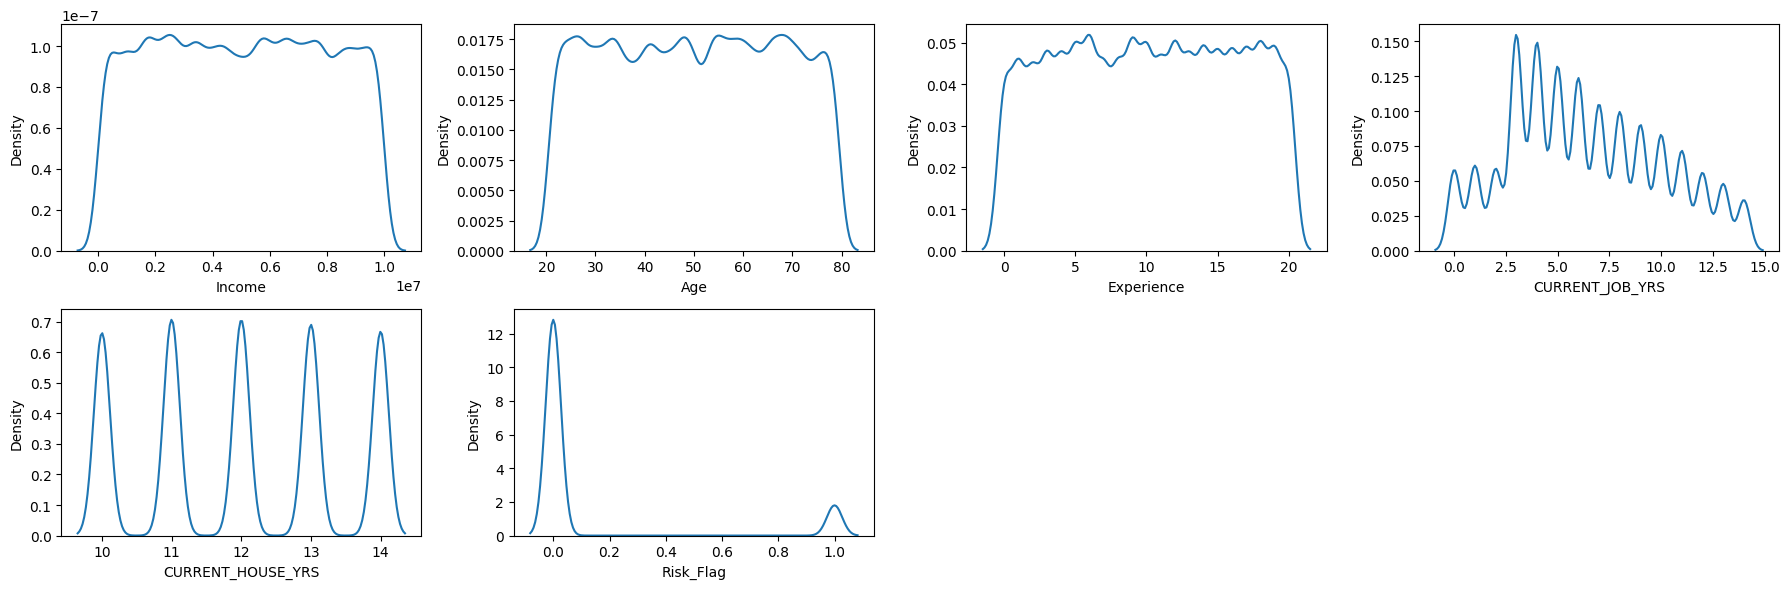

In [ ]:
# Menggunakan len(numerical) untuk mendapatkan jumlah fitur numerik
plt.figure(figsize=(18, 6))
features = numericals
# Loop melalui fitur numerik dan membuat subplot untuk setiap fitur
for i in range(len(numericals)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=data[features[i]], palette=palette)
    plt.xlabel(features[i])
    plt.tight_layout()
plt.show()

1. Untuk plot Income, Age, dan Experience dapat dilihat bahwa plot berdistribusi normal.
2. Untuk plot CURRENT_JOB_YRS, dapat dilihat bahwa kepadatan puncak terjadi pada sekitar 5 tahun dan kemudian menurun secara bertahap setelah itu. Ini menunjukkan bahwa sebagian besar orang yang bekerja di perusahaan tersebut memiliki pengalaman kerja antara 3 hingga 7 tahun. Setelah itu, jumlah orang yang bekerja di perusahaan tersebut menurun secara bertahap. Pola distribusi ini bisa dikatakan *Positively Skewed*
3. Untuk plot CURRENT_HOUSE_YRS, dapat dilihat bahwa data menunjukkan stabilitas atau kestabilan dalam jangka waktu tertentu. Dalam grafik tersebut, memiliki pola steady state atau dapat diindikasi bahwa tidak ada perubahan signifikan atau tren yang terlihat dalam data tersebut.
4. Untuk plot Risk_flag berdasarkan persebaran distribusi, terlihat bahwa mayoritas pelanggan tidak berisiko gagal bayar yaitu saat Risk_FLag = 0, sedangkan pelanggan yang berisiko atau Risk_Flag = 1 berjumlah sedikit namun signifikan dalam dataset.
5. Plot "CURRENT_JOB_YRS" "CURRENT_HOUSE_YRS" dan "Risk_Flag" termasuk tipe distribusi Bimodal.

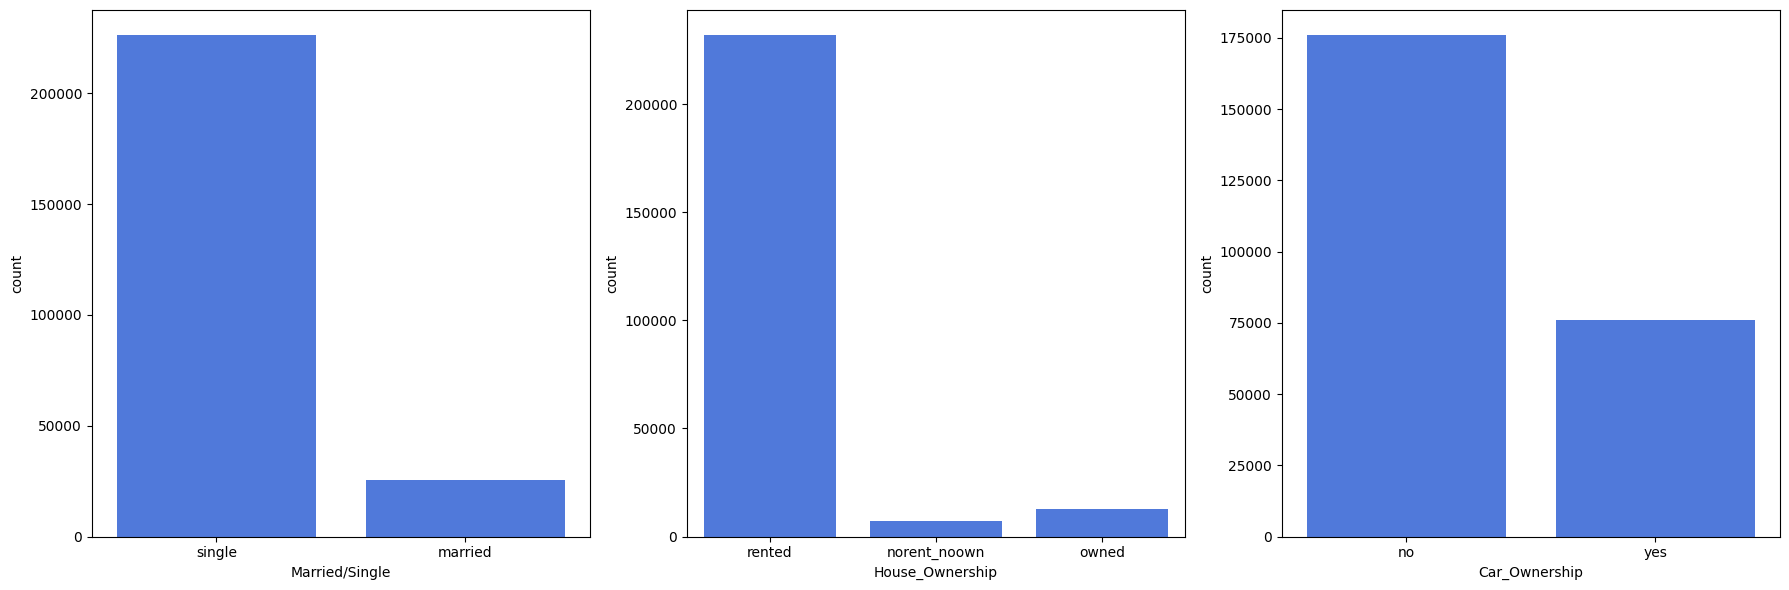

In [ ]:
# Menggunakan len(categoricals) untuk mendapatkan jumlah fitur kategorikal
plt.figure(figsize=(18, 6))
categorical = ["Married/Single", "House_Ownership", "Car_Ownership"]
features=categorical
# Loop melalui fitur kategorikal dan membuat subplot untuk setiap fitur
for i in range(len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=data[features[i]], color='#3970F1')
    plt.tight_layout()
plt.show()

1. Terdapat ketimpangan yang besar pada *House Ownership* antara rented, norent_noown dan owned.
2. Terdapat ketimpangan yang besar pada *Marriage/single* antara dimana mayoritas pelanggan merupakan single
3. Countplot *Car_wonership* yaitu, jumlah individu yang tidak menggunakan mobil lebih banyak dari pada individu yang menggunakan mobil.
Ini menunjukkan dalam analisis risiko kredit, kepemilikan mobil dapat menjadi faktor yang memengaruhi kemampuan seseorang untuk membayar pinjaman.

### Tugas No 3 Multivariate Analysis



<ipython-input-18-b88489819318>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='Blues', annot=True)


<Axes: >

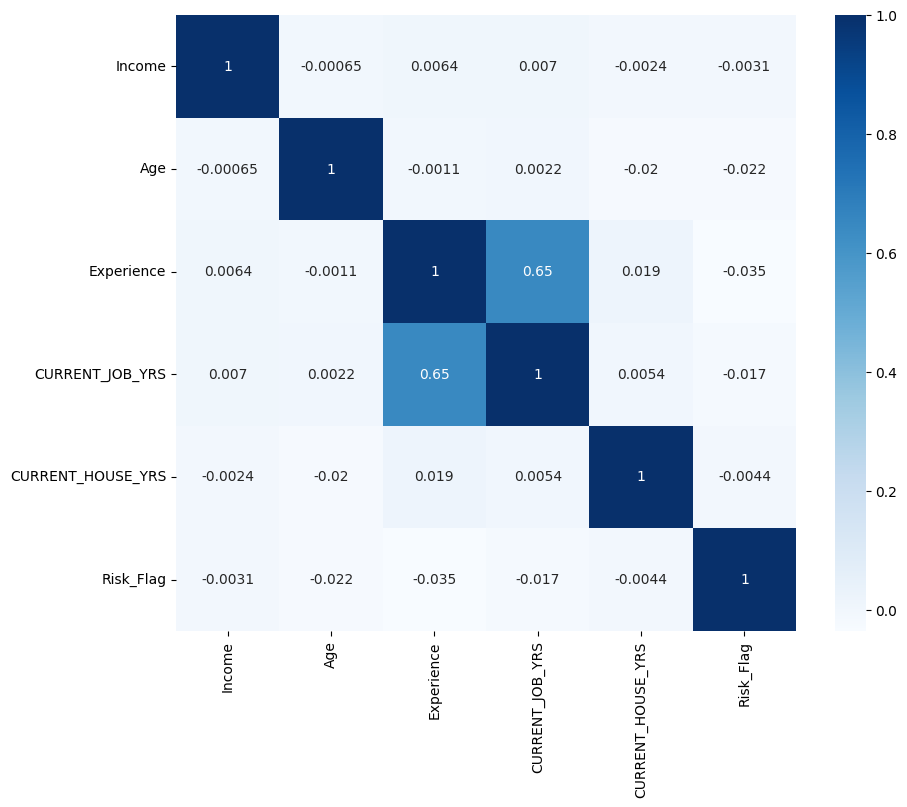

In [ ]:
# Mengecek korelasi feature dengan label menggunakan Correlation Heatmap (Numeric)
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='Blues', annot=True)

Korelasi masing-masing feature dan label disajikan sebagai berikut.
1. Feature "Income" berkorelasi negatif dengan "Risk_Flag" di angka -0.0034.
2. Feature "Age" berkorelasi negatif dengan "Risk_Flag" di angka -0.031.
3. Feature "Experience" berkorelasi negatif dengan "Risk_Flag" di angka -0.015.
4. Feature "CURRENT_JOB_YRS" berkorelasi positif dengan "Risk_Flag" di angka 0.0063.
5. Feature "CURRENT_HOUSE_YRS" berkorelasi negatif dengan "Risk_Flag" di angka -0.0034.

Karena korelasi tidak selalu menunjukkan hubungan kausalitas antara fitur dan label, maka berdasarkan angka korelasi terkuat, feature "Age" dan "Experience" adalah feature yang paling relevan dan dipertahankan.

<Figure size 1800x600 with 0 Axes>

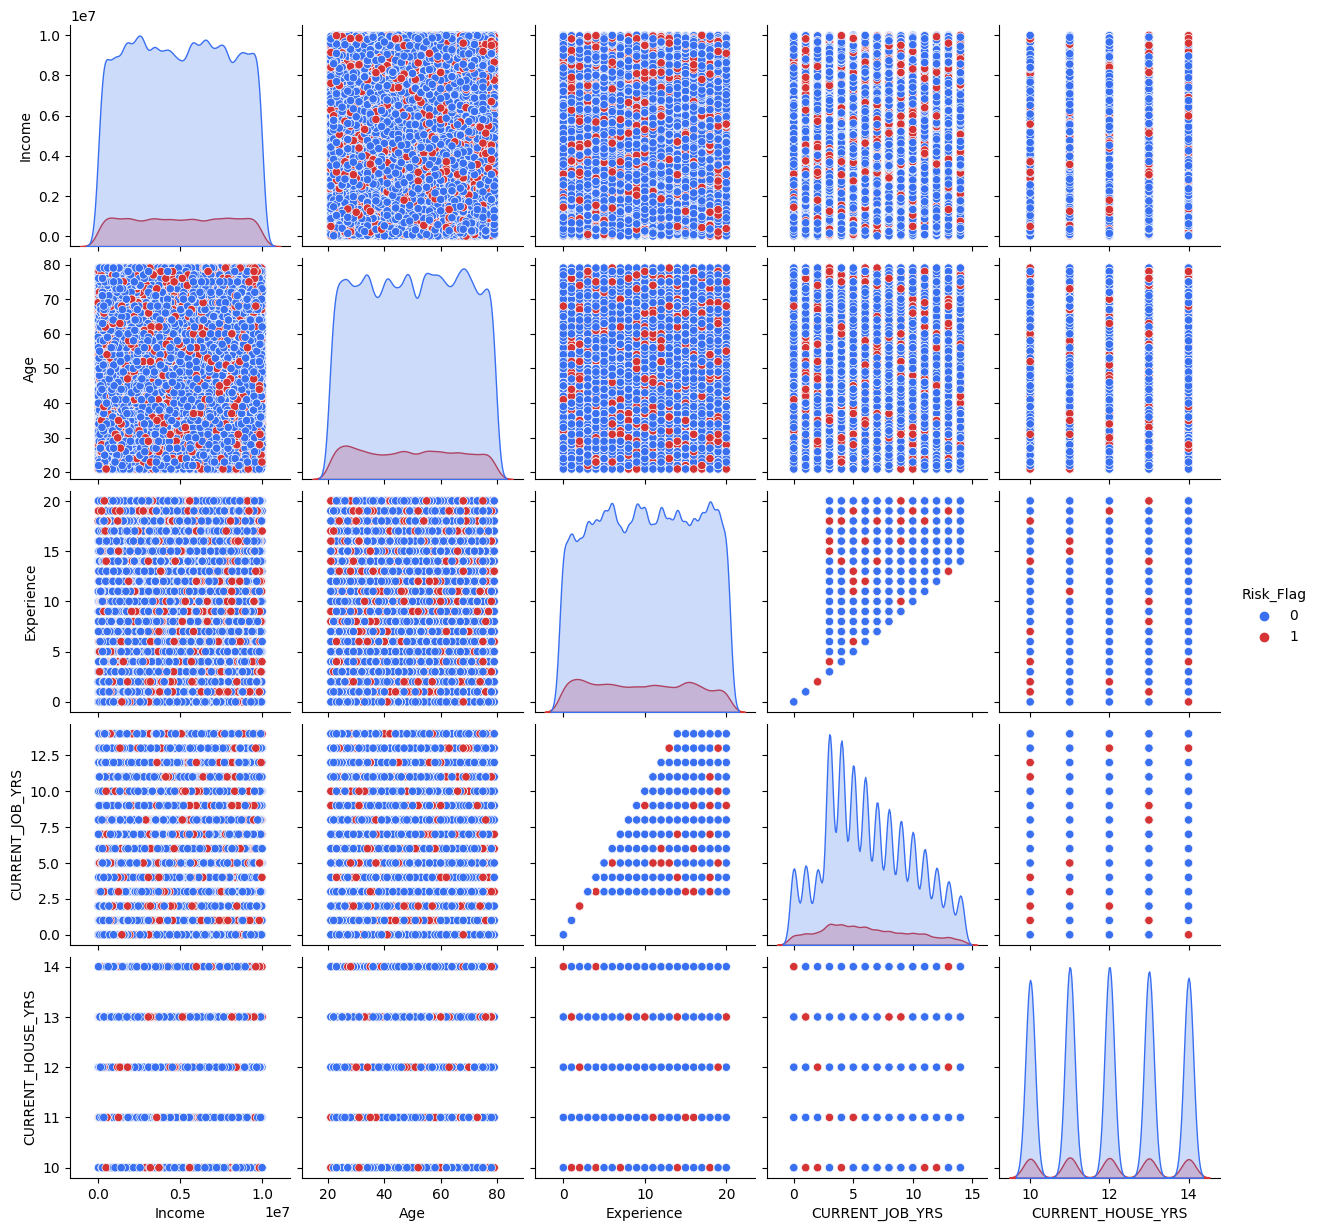

In [ ]:
# Menggunakan Pair Plots (Numeric)
plt.figure(figsize=(18, 6))
sns.pairplot(data, diag_kind='kde', hue='Risk_Flag', palette=palette)

Pada grafik Pair Plots (Numeric) di atas, dapat dilihat bahwa korelasi antar-feature Numeric tidak menunjukkan pola yang menarik, sehingga diperlukan segmentasi yang lebih baik.

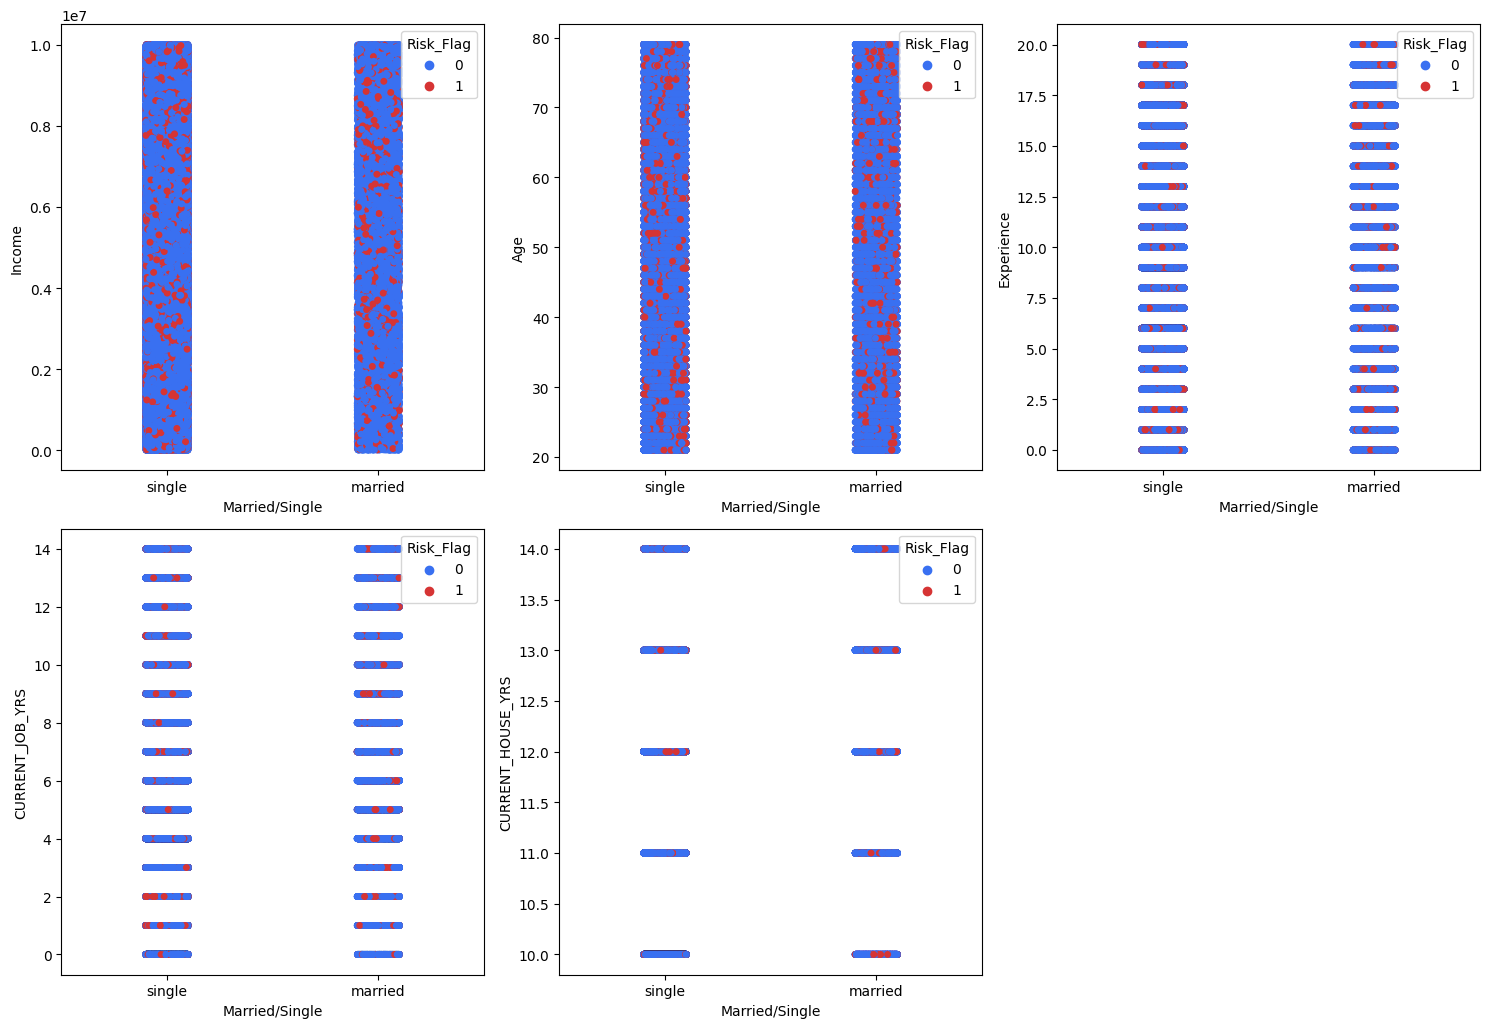

In [ ]:
# Married/Single
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numerical)) :
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=data, x='Married/Single', y=numerical[i], hue='Risk_Flag', palette=palette)
    plt.tight_layout()

Pada grafik Category Plots (Category-Numeric) di atas, dapat dilihat bahwa korelasi feature "Married/Single" dengan feature Numeric tidak menunjukkan pola yang menarik.

<ipython-input-24-eb5da01241c0>:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
<ipython-input-24-eb5da01241c0>:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
<ipython-input-24-eb5da01241c0>:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
<ipython-input-24-eb5da01241c0>:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
<ipython-input-24-eb5da01241c0>:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" ca

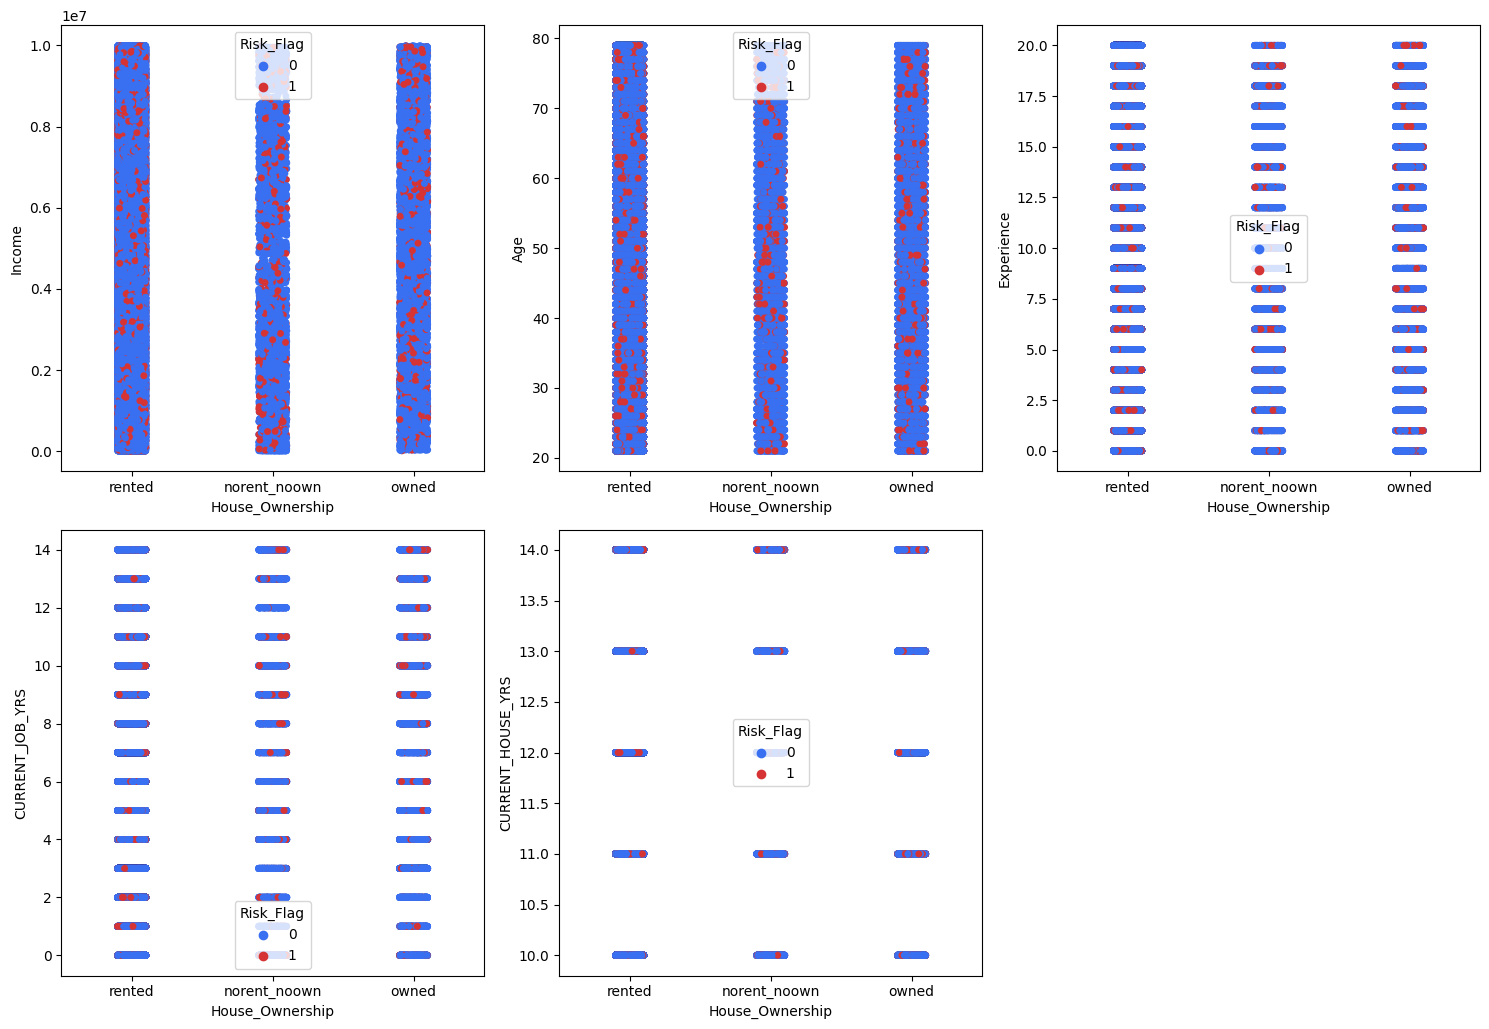

In [ ]:
# House_Ownership
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numerical)) :
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=data, x='House_Ownership', y=numerical[i], hue='Risk_Flag', palette=palette)
    plt.tight_layout()

Pada grafik Category Plots (Category-Numeric) di atas, dapat dilihat bahwa korelasi feature "House_Ownership" dengan feature Numeric tidak menunjukkan pola yang menarik.

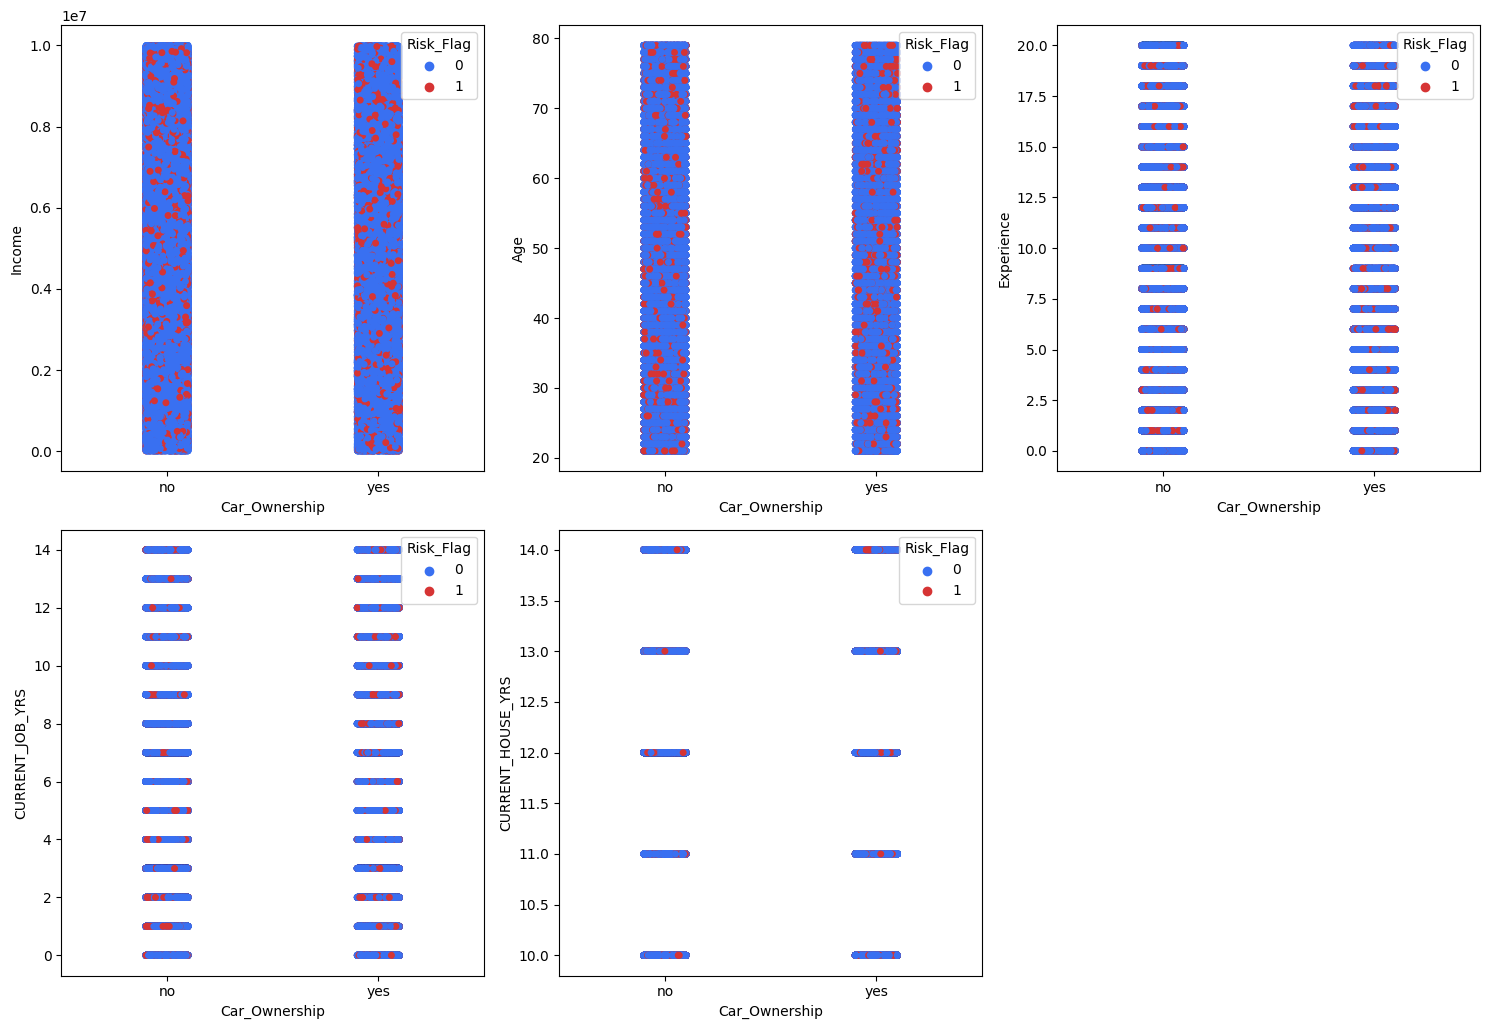

In [ ]:
# Car_Ownership
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numerical)) :
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=data, x='Car_Ownership', y=numerical[i], hue='Risk_Flag', palette=palette)
    plt.tight_layout()

Pada grafik Category Plots (Category-Numeric) di atas, dapat dilihat bahwa korelasi feature "Car_Ownership" dengan feature Numeric tidak menunjukkan pola yang menarik.

Untuk Category "Profession", "CITY", dan "STATE" tidak dilakukan pengecekan karena segmentasinya terlalu banyak.

### Tugas No 4 Business Insight

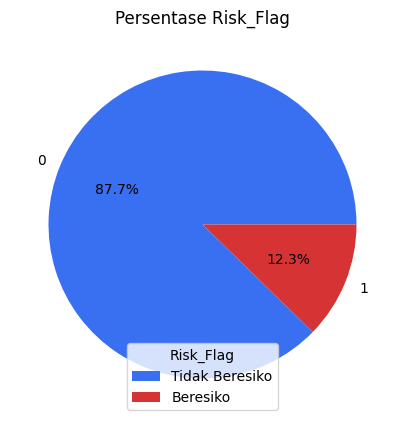

In [ ]:
risk_counts = data['Risk_Flag'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(risk_counts,
        labels=risk_counts.index,
        colors=['#3970F1', '#D63434'],
        autopct='%1.1f%%'
       )

plt.title('Persentase Risk_Flag')

legend_labels = ['Tidak Beresiko', 'Beresiko']
plt.legend(legend_labels, title="Risk_Flag", loc='lower center')

plt.show()

Berdasarkan grafik diatas menunjukkan persentase risk_flag dengan 2 kategori, yaitu 0 dan 1. Risk_flag 0 memiliki persentase 87.7%, sedangkan risk_flag 1 memiliki persentase 12.3%. Hal ini menunjukan bahwa sebagian besar data memiliki Risk_Flag 0, yaitu tidak berisiko. Sedangkan sebagian kecil data memiliki Risk_Flag 1, yaitu berisiko.

#### Insight 1 : Risk Rate Analysis Based on Profession

In [ ]:
prof_risk_count = data.groupby('Profession')['Risk_Flag'].sum().reset_index()
prof_risk_count = prof_risk_count.sort_values(by='Risk_Flag', ascending=False).head(10).reset_index()

In [ ]:
prof_risk_count

,index,Profession,Risk_Flag
0,38,Police_officer,826
1,43,Software_Developer,750
2,0,Air_traffic_controller,715
3,46,Surveyor,714
4,37,Physician,710
5,3,Army_officer,709
6,28,Hotel_Manager,701
7,47,Technical_writer,697
8,7,Chartered_Accountant,690
9,41,Scientist,690


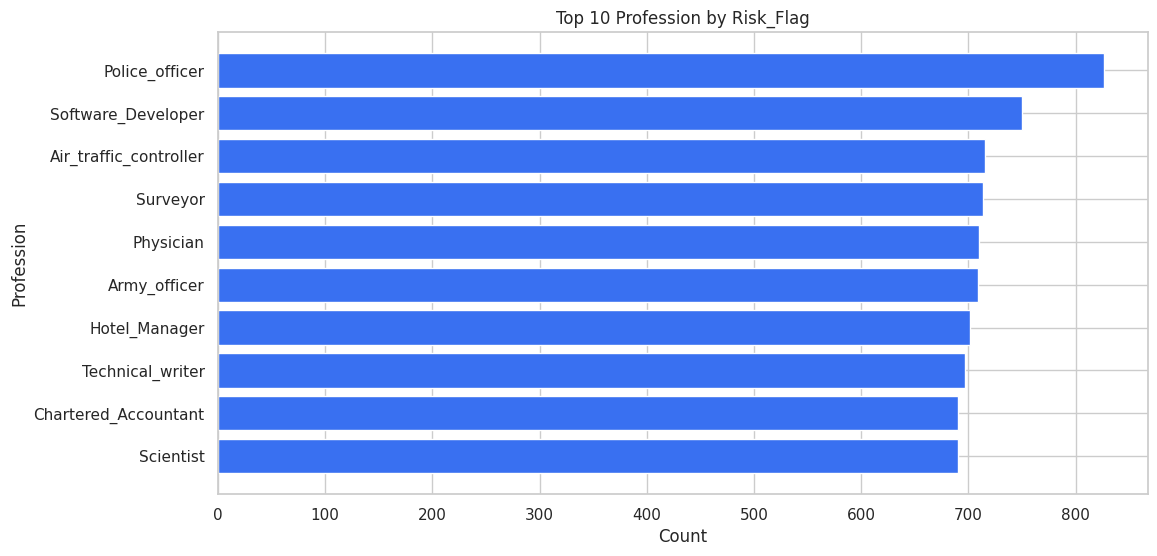

In [ ]:
# Melakukan visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

plt.barh(prof_risk_count['Profession'],
         prof_risk_count['Risk_Flag'],
         color='#3970F1'
         )

plt.xlabel('Count')
plt.ylabel('Profession')
plt.title('Top 10 Profession by Risk_Flag')

plt.gca().invert_yaxis()
plt.show()

**Insight :**  
- Visualisasi data Profession berdasarkan Risk_Flag menunjukkan bahwa nasabah dengan profesi "Police Officer" memiliki tingkat risiko gagal bayar yang tinggi dengan jumlah sekitar 826. Hal ini mengindikasikan bahwa tingkat risiko gagal bayar meningkat pada nasabah yang berprofesi sebagai police_officer. Ada dua kemungkinan penyebab risiko gagal bayar ini. Pertama, mereka mungkin menghadapi kesulitan keuangan jika memiliki hutang besar atau beban keuangan lainnya. Kedua, risiko gagal bayar dapat disebabkan oleh kesulitan dalam proses penagihan oleh pihak pemberi pinjaman kepada nasabah yang berprofesi sebagai police_officer.

**Rekomendasi :**  
- Mengatasi profesi dengan tingkat risiko tinggi, perusahaan dapat melakukan analisis risiko yang lebih mendalam dan mempertimbangkan persyaratan tambahan sebelum memberikan persetujuan pinjaman.

#### Insight 2 : Risk Rate Analysis Based on CURRENT_JOB_YRS

In [ ]:
job_counts = data.groupby('CURRENT_JOB_YRS')['Risk_Flag'].sum().reset_index()
job_counts = job_counts.sort_values(by='Risk_Flag', ascending=False)

In [ ]:
job_counts

,CURRENT_JOB_YRS,Risk_Flag
3,3,3411
4,4,3207
5,5,2972
6,6,2870
7,7,2345
8,8,2181
2,2,1890
10,10,1880
9,9,1850
1,1,1802


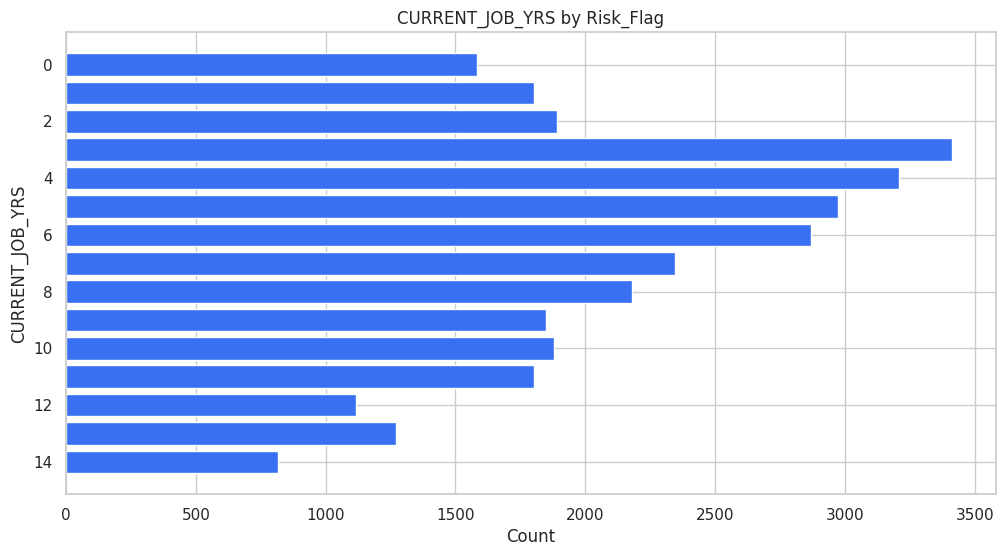

In [ ]:
# Melakukan visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

plt.barh(job_counts['CURRENT_JOB_YRS'],
         job_counts['Risk_Flag'],
         color='#3970F1'
         )

plt.xlabel('Count')
plt.ylabel('CURRENT_JOB_YRS')
plt.title('CURRENT_JOB_YRS by Risk_Flag')

plt.gca().invert_yaxis()
plt.show()

**Insight :**     
- Berdasarkan data CURRENT_JOB_YRS dan Risk_Flag, terlihat bahwa nasabah yang telah memiliki pengalaman kerja selama 3 hingga 6 tahun cenderung memiliki tingkat risiko gagal bayar pinjaman yang lebih tinggi. Namun, setelah melewati periode ini, risiko gagal bayar cenderung menurun secara signifikan. Khususnya, pada tahun ke-10, terjadi kenaikan dalam risiko gagal bayar, kemudian mengalami penurunan pada tahun berikutnya.
Hal ini menunjukkan bahwa nasabah yang telah bekerja selama 3 hingga 6 tahun mungkin mengalami tekanan finansial atau risiko gagal bayar yang lebih tinggi, seperti tingkat tanggung jawab yang meningkat, faktor meningkatnya komitmen finansial atau perubahan dalam situasi keuangan pribadi.

**Rekomendasi :**  
- Pemantauan Intensif pada Tahun 3-6, perusahaan dapat memfokuskan pemantauan khusus pada nasabah yang berada dalam kisaran 3-6 tahun pengalaman kerja untuk meminimalisir risiko gagal bayar pinjaman.
- Rasio Utang Maksimum: Menetapkan rasio utang maksimum yang dapat diterima untuk nasabah dalam kategori pengalaman kerja 3 hingga 6 tahun untuk meminimalkan risiko gagal bayar.
- Evaluasi Khusus untuk Nasabah dengan Pengalaman 10 Tahun: Untuk nasabah dengan pengalaman kerja 10 tahun, perusahaan dapat melakukan evaluasi khusus untuk memahami faktor-faktor yang mungkin mempengaruhi risiko gagal bayar pada titik ini.

#### Insight 3 : Risk Rate Analysis Based on Married/Single

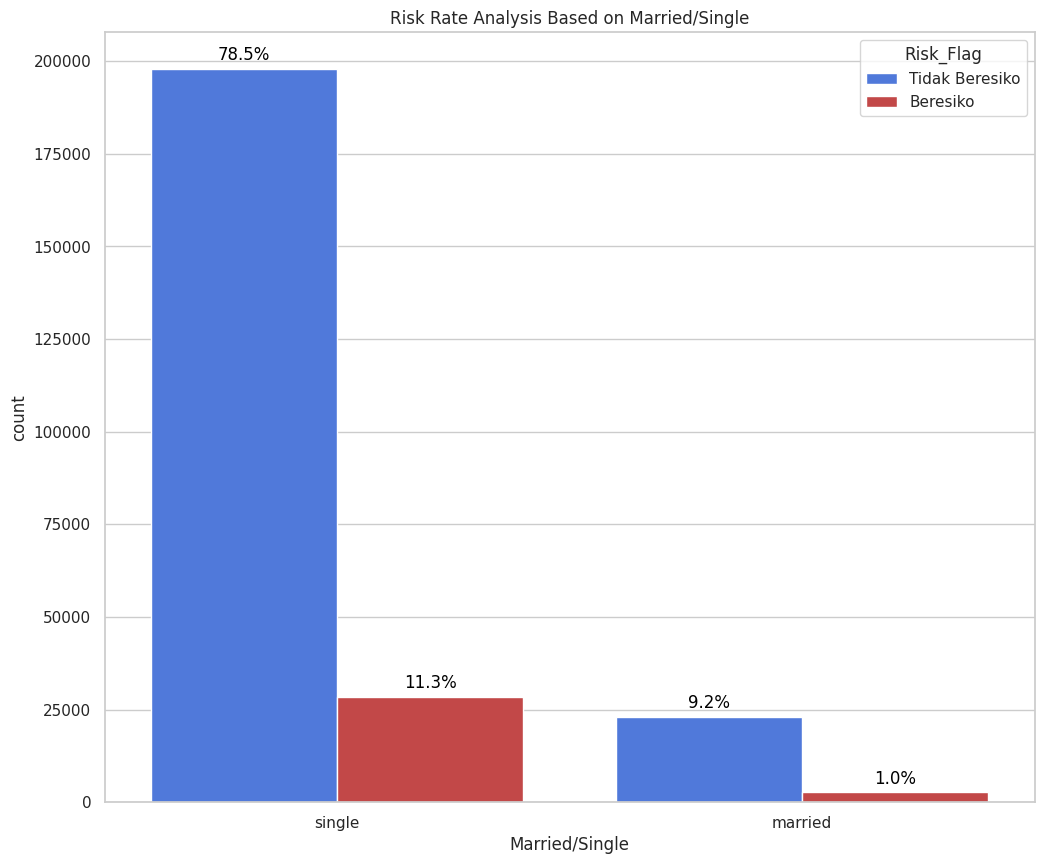

In [ ]:
# Melakukan visulisasi countplot
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
ax = sns.countplot(x='Married/Single',
                   data=data,
                   hue='Risk_Flag',
                   palette=palette
                  )

plt.title('Risk Rate Analysis Based on Married/Single')
plt.xlabel('Married/Single')
plt.ylabel("count")

legend_labels = ['Tidak Beresiko', 'Beresiko']
plt.legend(legend_labels, title="Risk_Flag")

# Menghitung dan menampilkan persentase dari setiap kelompok di visualisasi
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='center',
                fontsize=12,
                color='black',
                xytext=(0, 10),
                textcoords='offset points'
               )

plt.show()

**Insight :**  
- Berdasarkan data Married/Single dan Risk_Flag, terdapat perbedaan signifikan dalam tingkat risiko gagal bayar pinjaman antara pelanggan yang memiliki status single (11,3%) dan pelanggan yang berstatus married (1,0%). Hal ini mungkin disebabkan oleh beberapa faktor, seperti perbedaan dalam pendapatan, kepemilikan aset, dan tingkat tanggungan biaya hidup. Namun, perlu diperhatikan bahwa pelanggan yang berstatus single cenderung menunjukkan karakter kepribadian yang kurang bertanggung jawab dibandingkan dengan pelanggan yang berstatus married.

**Rekomendasi :**  
- Perusahaan dapat melakukan analisis lebih mendalam terhadap peminjam yang memiliki status 'single' dan dianggap memiliki risiko yang lebih tinggi. Dengan pendekatan ini, perusahaan dapat memastikan bahwa mereka mengidentifikasi peminjam 'single' yang sebenarnya memiliki kelayakan kredit, sehingga dapat mengurangi risiko gagal bayar dan tetap melayani pelanggan yang kredibel.

- Segmentasi pelanggan berdasarkan status merried/single mungkin menjadi strategi yang efektif. Ini dapat membantu perusahaan dalam menawarkan produk dan layanan yang lebih sesuai dengan karakteristik dan kebutuhan masing-masing kelompok.


### Tugas 5 Git


Upload project teman-teman di sebuah repository git. Berkolaborasilah di Git jika ada perubahan version dari waktu ke waktu.

A. Buat Repository Git

Link repository : [klik disini](https://github.com/HafiizhTH/FinalProject_Kelompok1A.git)  

B. Upload file notebook atau file pengerjaan lainnya pada repository tersebut
Untuk file README, dapat merupakan summary insight yang telah didapatkan dari EDA.